#***PNEUMONIA DETECTION (CHEST X-RAYS)***



## Dataset is downloaded from kaggle, you can find the dataset in this link: [See Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)


**OBJECTIVE 1: CNN TO DETECT PNEUMONIA**

In [ ]:
!pip install tensorflow
!pip install keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        directory = r'/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/train/',
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 1096 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        directory = r'/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/test/',
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 266 images belonging to 2 classes.


In [ ]:
validation = ImageDataGenerator(rescale=1./255)
vall = test_datagen.flow_from_directory(
        directory = r'/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/val/',
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 16 images belonging to 2 classes.


#**INITIALIZE CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

#**CONVULOTION**

In [ ]:
cnn.add(tf.keras.layers.InputLayer(shape=(64, 64, 3)))
cnn.add(tf.keras.layers.Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu'))

#**POOLING**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D( pool_size = 2 , strides = 2))

#**FLATTENING**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#**FULLY CONNECTION**

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 128 , activation = 'relu'))

#**ADDING THE OUTPUT LAYER:**

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

#**COMPILE THE MODEL**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#**FITTING THE MODEL**

In [ ]:
history=cnn.fit(x = training_set , validation_data = vall , epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5437 - loss: 1.1394 - val_accuracy: 0.7500 - val_loss: 0.5533
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 799ms/step - accuracy: 0.8589 - loss: 0.4271 - val_accuracy: 0.6875 - val_loss: 0.4398
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 801ms/step - accuracy: 0.9080 - loss: 0.2773 - val_accuracy: 0.7500 - val_loss: 0.4545
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 798ms/step - accuracy: 0.9155 - loss: 0.2286 - val_accuracy: 0.8125 - val_loss: 0.4458
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 770ms/step - accuracy: 0.9241 - loss: 0.2186 - val_accuracy: 0.7500 - val_loss: 0.3552
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 771ms/step - accuracy: 0.8819 - loss: 0.2676 - val_accuracy: 0.6875 - val_loss: 0.5805
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 763ms/step - accuracy: 0.9224 - loss: 0.2218 - val_accuracy: 0.7500 - val_loss: 0.3647
Epoch 8/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 784ms/step - accuracy: 0.9568 - loss: 0.1568 - val_accurac

#**EVOLUTION**

In [ ]:
test_loss, test_acc = cnn.evaluate(test_set, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

9/9 - 67s - 7s/step - accuracy: 0.8346 - loss: 0.6733
The accuracy of the model is:
0.8345864415168762


#**PLOT THE ACCURACY**

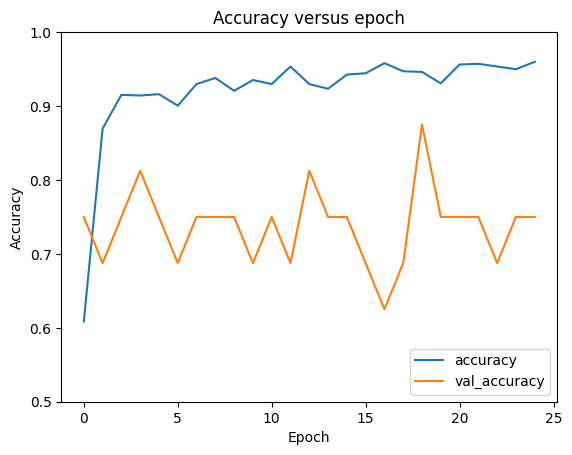

In [ ]:
plt.title("Accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

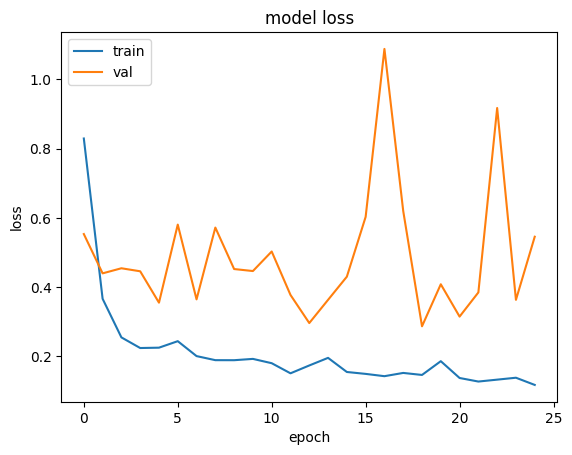

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#**PREDICTION**

In [ ]:
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img('/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/test/PNEUMONIA/person137_bacteria_655.jpeg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'Negative (normal)'
else:
  prediction = 'Positive (Covid)'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Positive (Covid)


**OBJECTIVE 2: GRAD-CAM HEATMAPS F0R CLINICAL INTERPRETABILITY**

#**VISUALIZATION**

In [125]:
!pip install --upgrade opencv-python
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import os
from PIL import Image
import cv2
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

Using device: cpu


In [87]:
def visualize_pytorch_data():
    """Visualize sample images from the dataset"""
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))

    train_dir = '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/train/'

    # Normal samples
    normal_path = os.path.join(train_dir, 'NORMAL')
    normal_images = [os.path.join(normal_path, img) for img in os.listdir(normal_path)[:5]]

    for idx, img_path in enumerate(normal_images):
        img = Image.open(img_path).convert('RGB')
        axes[0, idx].imshow(img)
        axes[0, idx].set_title('Normal')
        axes[0, idx].axis('off')

    # Pneumonia samples
    pneumonia_path = os.path.join(train_dir, 'PNEUMONIA')
    pneumonia_images = [os.path.join(pneumonia_path, img) for img in os.listdir(pneumonia_path)[:5]]

    for idx, img_path in enumerate(pneumonia_images):
        img = Image.open(img_path).convert('RGB')
        axes[1, idx].imshow(img)
        axes[1, idx].set_title('Pneumonia')
        axes[1, idx].axis('off')

    plt.tight_layout()
    plt.show()

In [88]:
def plot_class_distribution_pytorch():
    """Plot class distribution"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    directories = {
        'Train': '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/train/',
        'Validation': '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/test/',
        'Test': '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/val/'
    }

    for idx, (title, directory) in enumerate(directories.items()):
        normal_count = len(os.listdir(os.path.join(directory, 'NORMAL')))
        pneumonia_count = len(os.listdir(os.path.join(directory, 'PNEUMONIA')))

        axes[idx].bar(['Normal', 'Pneumonia'], [normal_count, pneumonia_count],
                     color=['lightblue', 'lightcoral'])
        axes[idx].set_title(f'{title} Distribution\nTotal: {normal_count + pneumonia_count}')
        axes[idx].set_ylabel('Number of Images')

        for i, v in enumerate([normal_count, pneumonia_count]):
            axes[idx].text(i, v + 10, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()



Data Samples Visualization:


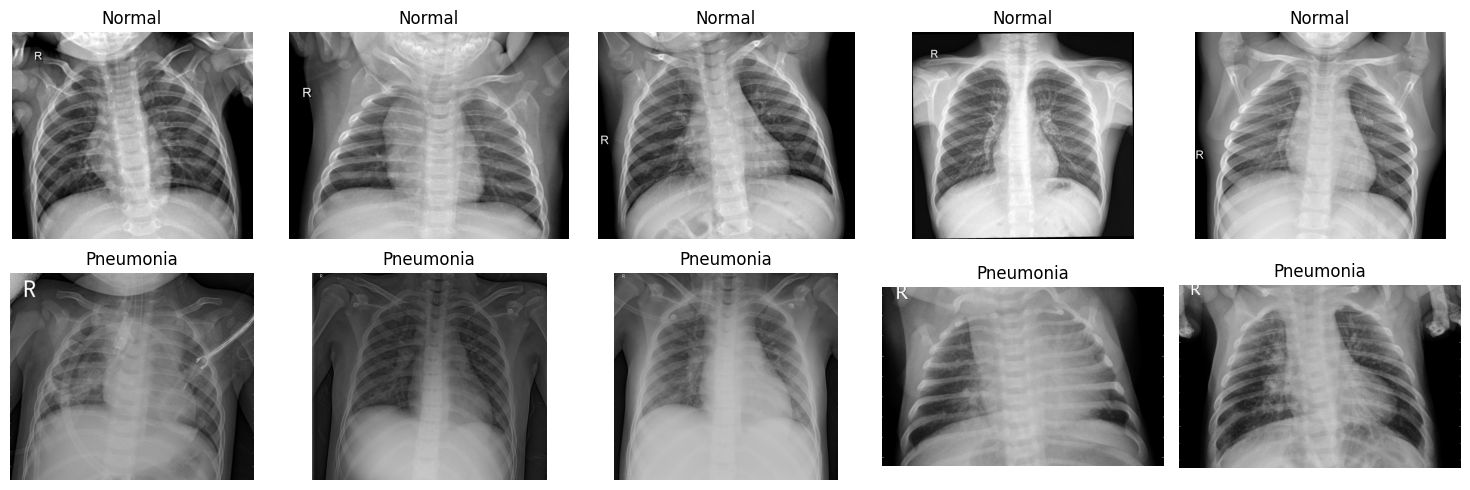


Class Distribution:


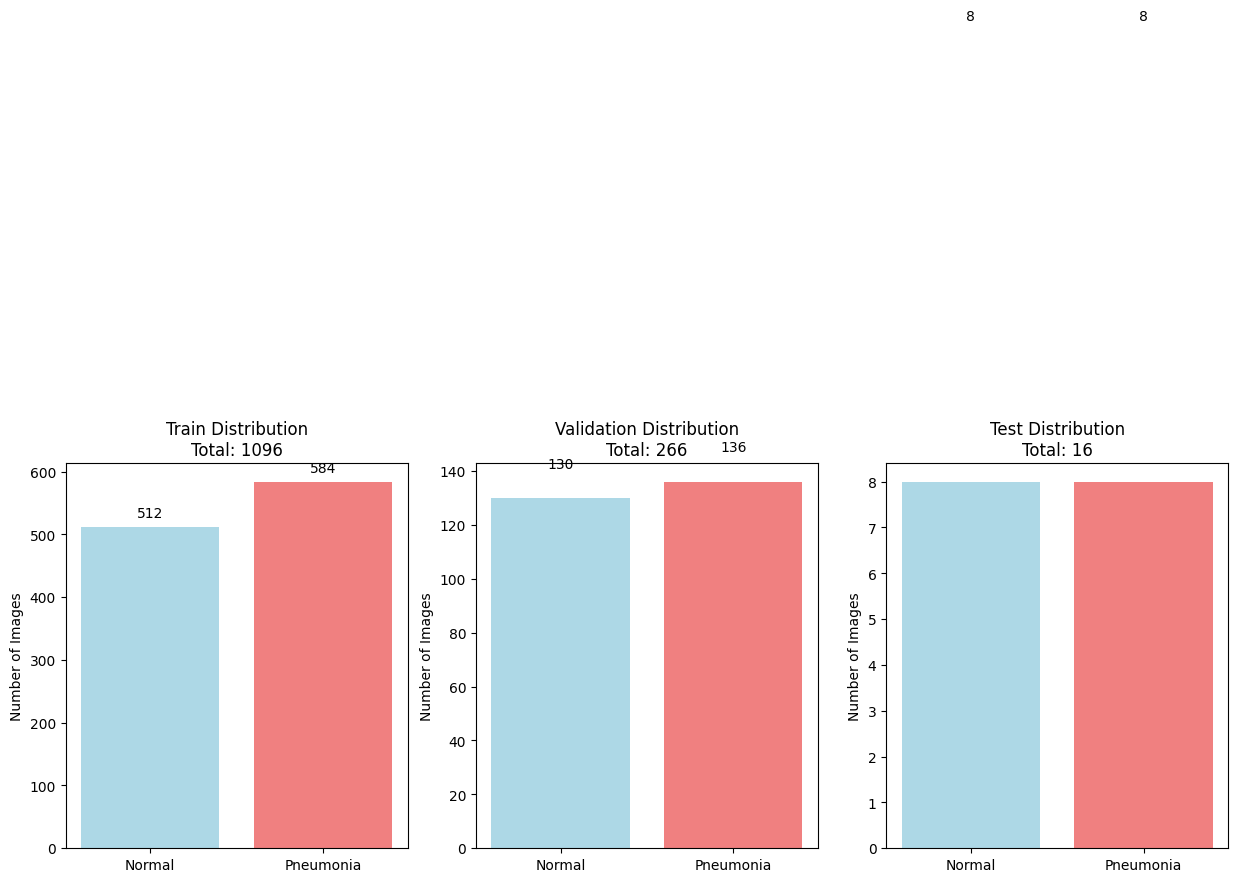

In [89]:
# Execute visualizations
print("Data Samples Visualization:")
visualize_pytorch_data()

print("\nClass Distribution:")
plot_class_distribution_pytorch()

#**DATA TRANSFORMATION**

In [90]:
train_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(0.3),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dir = '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/train/'
val_dir = '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/val/'
test_dir = '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/test/'

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Classes: {train_dataset.classes}")

Training samples: 1096
Validation samples: 16
Test samples: 266
Classes: ['NORMAL', 'PNEUMONIA']


#**PYTORCH MODEL DEFINITION**

In [121]:
class PneumoniaResNet(nn.Module):
    def __init__(self, num_classes=1):
        super(PneumoniaResNet, self).__init__()
        self.backbone = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

        # Freeze initial layers
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Unfreeze last few layers
        for param in self.backbone.layer4.parameters():
            param.requires_grad = True

        # Replace classifier
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.backbone(x)

class PneumoniaEfficientNet(nn.Module):
    def __init__(self, num_classes=1):
        super(PneumoniaEfficientNet, self).__init__()
        self.backbone = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

        # Freeze initial layers
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Unfreeze the last block of the features module for Grad-CAM applicability
        # This makes the feature extractor trainable in its final stages.
        for param in self.backbone.features[-1].parameters():
            param.requires_grad = True

        # Unfreeze classifier parameters
        for param in self.backbone.classifier.parameters():
            param.requires_grad = True

        # Modify classifier
        in_features = self.backbone.classifier[1].in_features
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.backbone(x)

#**INITIALIZE MODELS**

In [122]:
resnet_model = PneumoniaResNet().to(device)
efficientnet_model = PneumoniaEfficientNet().to(device)

# print("ResNet50 Model:")
# print(resnet_model)
# print("\nEfficientNetB0 Model:")
# print(efficientnet_model)

#**TRAINING AND FUNCTION**

In [123]:
def train_model(model, train_loader, val_loader, model_name, num_epochs=15):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.2)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.float().to(device)
            labels = labels.unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.float().to(device)
                labels = labels.unsqueeze(1)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item()
                predicted = (outputs > 0.5).float()
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total

        # Update learning rate
        scheduler.step(val_loss)

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), f'best_{model_name}.pth')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

    # Load best model
    model.load_state_dict(torch.load(f'best_{model_name}.pth'))

    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'model': model
    }

#**TRAIN PYTORCH MODEL**

In [124]:
print("Training ResNet50...")
resnet_history = train_model(resnet_model, train_loader, val_loader, 'resnet_pytorch')

print("\n" + "="*50)
print("Training EfficientNetB0...")
efficientnet_history = train_model(efficientnet_model, train_loader, val_loader, 'efficientnet_pytorch')

Training ResNet50...
Epoch [1/15], Train Loss: 0.2234, Train Acc: 90.69%, Val Loss: 0.4020, Val Acc: 81.25%
Epoch [2/15], Train Loss: 0.1225, Train Acc: 95.71%, Val Loss: 0.1850, Val Acc: 93.75%
Epoch [3/15], Train Loss: 0.1044, Train Acc: 96.44%, Val Loss: 0.3180, Val Acc: 87.50%
Epoch [4/15], Train Loss: 0.0955, Train Acc: 96.44%, Val Loss: 0.3458, Val Acc: 87.50%
Epoch [5/15], Train Loss: 0.0702, Train Acc: 97.08%, Val Loss: 0.5519, Val Acc: 68.75%
Epoch [6/15], Train Loss: 0.0763, Train Acc: 97.17%, Val Loss: 1.6758, Val Acc: 62.50%
Early stopping at epoch 7

Training EfficientNetB0...
Epoch [1/15], Train Loss: 0.3139, Train Acc: 87.77%, Val Loss: 0.2471, Val Acc: 100.00%
Epoch [2/15], Train Loss: 0.2227, Train Acc: 91.61%, Val Loss: 0.4749, Val Acc: 81.25%
Epoch [3/15], Train Loss: 0.1777, Train Acc: 93.98%, Val Loss: 0.4632, Val Acc: 81.25%
Epoch [4/15], Train Loss: 0.1877, Train Acc: 92.34%, Val Loss: 0.4119, Val Acc: 81.25%
Epoch [5/15], Train Loss: 0.1673, Train Acc: 93.61%, V

#**PLOTTING TRAINING HISTORY**

ResNet50 Training History:


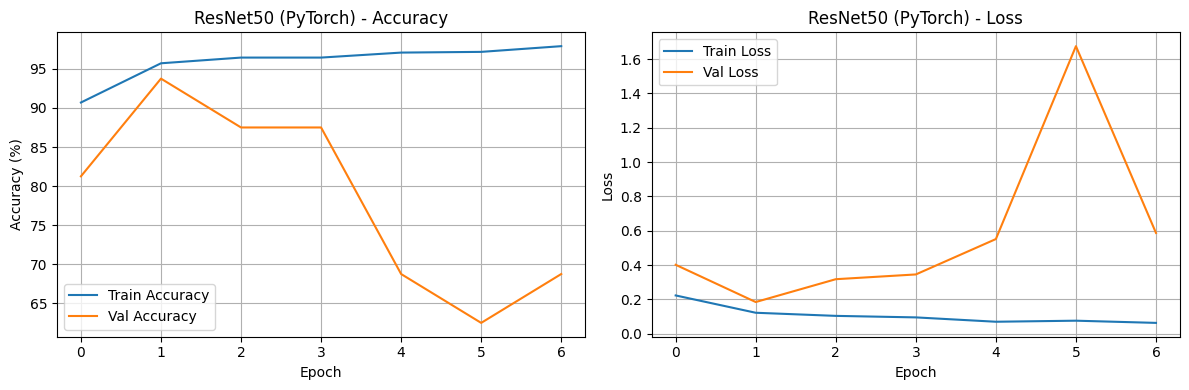

EfficientNetB0 Training History:


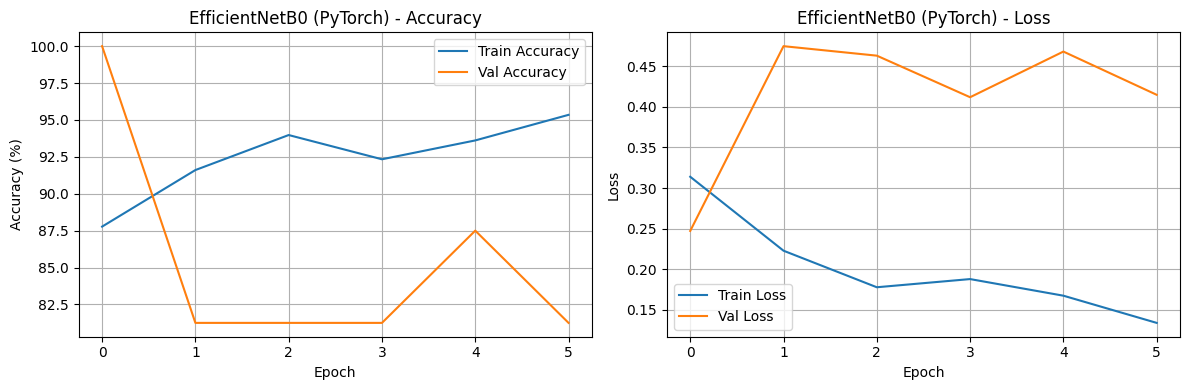

In [126]:
def plot_pytorch_training(history, model_name):
    """Plot training history for PyTorch models"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    ax1.plot(history['train_accuracies'], label='Train Accuracy')
    ax1.plot(history['val_accuracies'], label='Val Accuracy')
    ax1.set_title(f'{model_name} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy (%)')
    ax1.legend()
    ax1.grid(True)

    # Loss plot
    ax2.plot(history['train_losses'], label='Train Loss')
    ax2.plot(history['val_losses'], label='Val Loss')
    ax2.set_title(f'{model_name} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

print("ResNet50 Training History:")
plot_pytorch_training(resnet_history, 'ResNet50 (PyTorch)')

print("EfficientNetB0 Training History:")
plot_pytorch_training(efficientnet_history, 'EfficientNetB0 (PyTorch)')

#**EVALUATION**

In [127]:
def evaluate_pytorch_model(model, test_loader, model_name):
    """Evaluate PyTorch model"""
    model.eval()
    all_predictions = []
    all_labels = []
    test_loss = 0.0
    criterion = nn.BCELoss()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.float().to(device)
            labels = labels.unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            predictions = (outputs > 0.5).float()
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions).flatten()
    all_labels = np.array(all_labels).flatten()

    # Calculate metrics
    accuracy = (all_predictions == all_labels).mean()
    precision = ((all_predictions == 1) & (all_labels == 1)).sum() / (all_predictions == 1).sum()
    recall = ((all_predictions == 1) & (all_labels == 1)).sum() / (all_labels == 1).sum()
    f1 = f1_score(all_labels, all_predictions)

    print(f"\n{model_name} Evaluation:")
    print(f"Test Loss: {test_loss/len(test_loader):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1-Score: {f1:.4f}")

    # Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(all_labels, all_predictions,
                              target_names=['Normal', 'Pneumonia']))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Pneumonia'],
                yticklabels=['Normal', 'Pneumonia'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {
        'loss': test_loss/len(test_loader),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

#**EVALUATE BOTH PYTORCH MODELS**

Evaluating PyTorch Models:

ResNet50 (PyTorch) Evaluation:
Test Loss: 0.8782
Test Accuracy: 0.8496
Test Precision: 0.8582
Test Recall: 0.8456
Test F1-Score: 0.8519

Classification Report for ResNet50 (PyTorch):
              precision    recall  f1-score   support

      Normal       0.84      0.85      0.85       130
   Pneumonia       0.86      0.85      0.85       136

    accuracy                           0.85       266
   macro avg       0.85      0.85      0.85       266
weighted avg       0.85      0.85      0.85       266



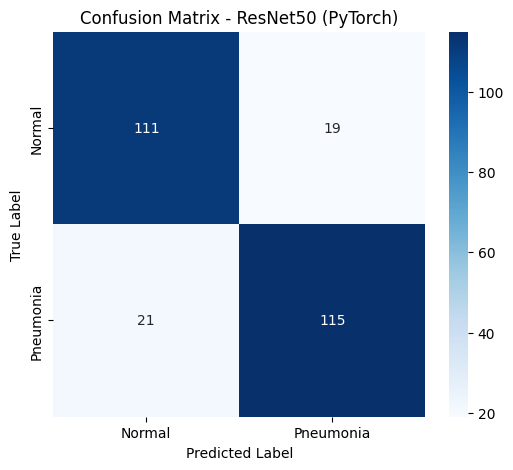


EfficientNetB0 (PyTorch) Evaluation:
Test Loss: 0.5021
Test Accuracy: 0.7895
Test Precision: 0.7941
Test Recall: 0.7941
Test F1-Score: 0.7941

Classification Report for EfficientNetB0 (PyTorch):
              precision    recall  f1-score   support

      Normal       0.78      0.78      0.78       130
   Pneumonia       0.79      0.79      0.79       136

    accuracy                           0.79       266
   macro avg       0.79      0.79      0.79       266
weighted avg       0.79      0.79      0.79       266



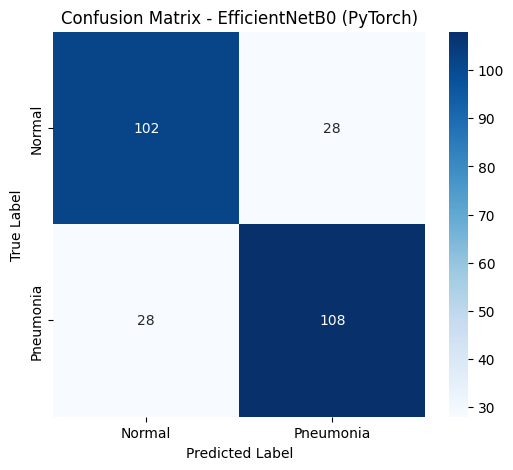

In [128]:
print("Evaluating PyTorch Models:")
resnet_results_pt = evaluate_pytorch_model(resnet_model, test_loader, "ResNet50 (PyTorch)")
effnet_results_pt = evaluate_pytorch_model(efficientnet_model, test_loader, "EfficientNetB0 (PyTorch)")

#**PYTORCH GRAD CAM**

In [129]:
import torch.nn.functional as F

class WorkingGradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.activations = None
        self.gradients = None

        # Register hooks - using the standard backward hook for compatibility
        self.forward_handle = target_layer.register_forward_hook(self._forward_hook)
        self.backward_handle = target_layer.register_backward_hook(self._backward_hook)

    def _forward_hook(self, module, input, output):
        self.activations = output

    def _backward_hook(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate_heatmap(self, input_tensor, target_class=None):
        self.model.eval()

        # Store original training mode
        original_training = self.model.training
        self.model.eval()

        # Forward pass
        output = self.model(input_tensor)

        if target_class is None:
            target_class = 1 if output.item() > 0.5 else 0

        # Zero gradients
        self.model.zero_grad()

        # Create target for backward pass
        target = output if target_class == 1 else 1 - output

        # Backward pass
        target.backward()

        # Check if gradients were captured
        if self.gradients is None:
            self._cleanup()
            raise ValueError("Gradients not captured. Try a different layer.")

        # Global average pooling of gradients
        pooled_grads = torch.mean(self.gradients, dim=[0, 2, 3])

        # Weight the activations by corresponding gradients
        weighted_activations = torch.zeros_like(self.activations)
        for i in range(pooled_grads.size(0)):
            weighted_activations[:, i, :, :] = self.activations[:, i, :, :] * pooled_grads[i]

        # Generate heatmap
        heatmap = torch.mean(weighted_activations, dim=1).squeeze()
        heatmap = F.relu(heatmap)  # Apply ReLU

        # Convert to numpy and normalize
        heatmap = heatmap.detach().cpu().numpy()
        heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)

        self._cleanup()
        return heatmap

    def _cleanup(self):
        """Remove hooks to avoid memory leaks"""
        self.forward_handle.remove()
        self.backward_handle.remove()

def get_working_gradcam(model, image_path, model_name, target_layer):
    """Robust Grad-CAM implementation that works for both models"""
    try:
        # Load and preprocess image
        image = Image.open(image_path).convert('RGB')
        original_image = np.array(image)

        transform = val_test_transforms
        input_tensor = transform(image).unsqueeze(0).to(device)

        # Generate Grad-CAM
        gradcam = WorkingGradCAM(model, target_layer)
        heatmap = gradcam.generate_heatmap(input_tensor)

        # Resize heatmap to match original image
        heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))

        # Convert to uint8 and apply colormap
        heatmap_uint8 = np.uint8(255 * heatmap_resized)
        heatmap_colored = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

        # Ensure original image is in correct format
        if len(original_image.shape) == 2:
            original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)
        else:
            original_image_rgb = original_image

        # Superimpose heatmap on original image
        superimposed_img = cv2.addWeighted(original_image_rgb, 0.6, heatmap_colored, 0.4, 0)

        # Display results
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(original_image_rgb)
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(heatmap_resized, cmap='jet')
        axes[1].set_title('Grad-CAM Heatmap')
        axes[1].axis('off')

        axes[2].imshow(superimposed_img)
        axes[2].set_title('Grad-CAM Overlay')
        axes[2].axis('off')

        plt.suptitle(f'{model_name} - Grad-CAM', fontsize=16)
        plt.tight_layout()
        plt.show()

        return True

    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")
        return False

Testing Grad-CAM with different layers...

Testing Grad-CAM with NORMAL image:

1. Testing ResNet50...
   Trying layer 1...


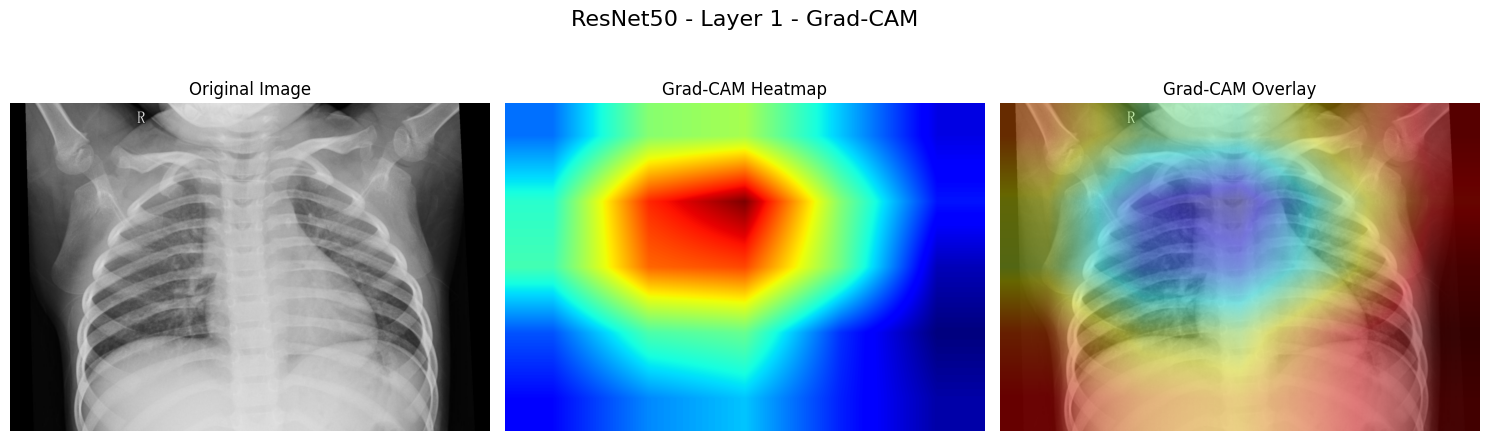

   ✓ ResNet50 Grad-CAM successful with layer 1

2. Testing EfficientNetB0...
   Trying layer 1...


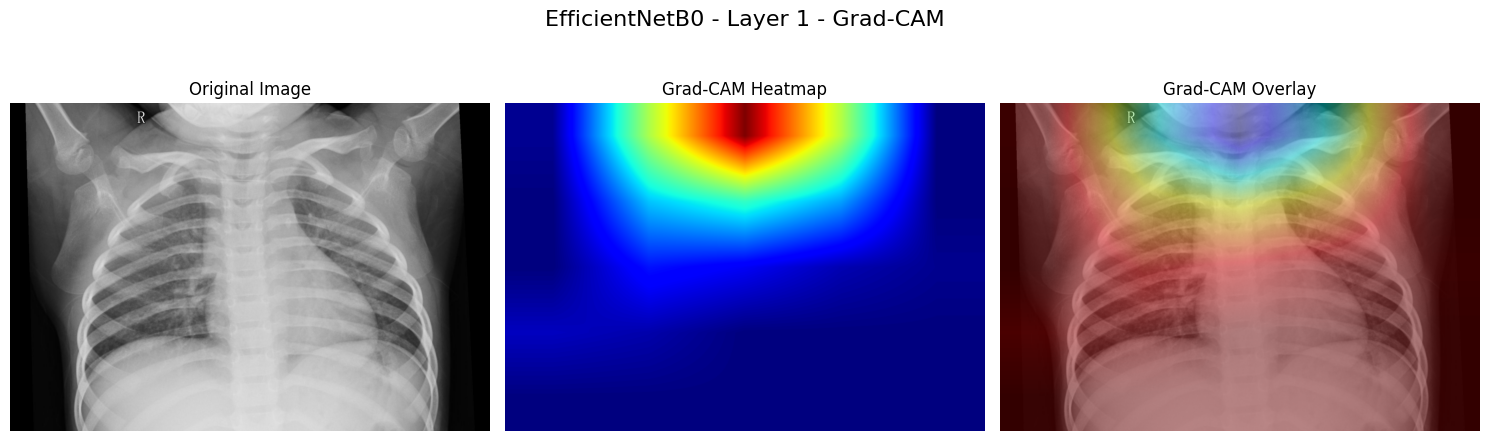

   ✓ EfficientNetB0 Grad-CAM successful with layer 1

Grad-CAM testing completed!


In [133]:
import torch.nn.functional as F

class WorkingGradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.activations = None
        self.gradients = None

        # Register hooks - using the standard backward hook for compatibility
        self.forward_handle = target_layer.register_forward_hook(self._forward_hook)
        self.backward_handle = target_layer.register_backward_hook(self._backward_hook)

    def _forward_hook(self, module, input, output):
        self.activations = output

    def _backward_hook(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate_heatmap(self, input_tensor, target_class=None):
        self.model.eval()

        # Store original training mode
        original_training = self.model.training
        self.model.eval()

        # Forward pass
        output = self.model(input_tensor)

        if target_class is None:
            target_class = 1 if output.item() > 0.5 else 0

        # Zero gradients
        self.model.zero_grad()

        # Create target for backward pass
        target = output if target_class == 1 else 1 - output

        # Backward pass
        target.backward()

        # Check if gradients were captured
        if self.gradients is None:
            self._cleanup()
            raise ValueError("Gradients not captured. Try a different layer.")

        # Global average pooling of gradients
        pooled_grads = torch.mean(self.gradients, dim=[0, 2, 3])

        # Weight the activations by corresponding gradients
        weighted_activations = torch.zeros_like(self.activations)
        for i in range(pooled_grads.size(0)):
            weighted_activations[:, i, :, :] = self.activations[:, i, :, :] * pooled_grads[i]

        # Generate heatmap
        heatmap = torch.mean(weighted_activations, dim=1).squeeze()
        heatmap = F.relu(heatmap)  # Apply ReLU

        # Convert to numpy and normalize
        heatmap = heatmap.detach().cpu().numpy()
        heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)

        self._cleanup()
        return heatmap

    def _cleanup(self):
        """Remove hooks to avoid memory leaks"""
        self.forward_handle.remove()
        self.backward_handle.remove()

def get_working_gradcam(model, image_path, model_name, target_layer):
    """Robust Grad-CAM implementation that works for both models"""
    try:
        # Load and preprocess image
        image = Image.open(image_path).convert('RGB')
        original_image = np.array(image)

        transform = val_test_transforms
        input_tensor = transform(image).unsqueeze(0).to(device)

        # Generate Grad-CAM
        gradcam = WorkingGradCAM(model, target_layer)
        heatmap = gradcam.generate_heatmap(input_tensor)

        # Resize heatmap to match original image
        heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))

        # Convert to uint8 and apply colormap
        heatmap_uint8 = np.uint8(255 * heatmap_resized)
        heatmap_colored = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

        # Ensure original image is in correct format
        if len(original_image.shape) == 2:
            original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)
        else:
            original_image_rgb = original_image

        # Superimpose heatmap on original image
        superimposed_img = cv2.addWeighted(original_image_rgb, 0.6, heatmap_colored, 0.4, 0)

        # Display results
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(original_image_rgb)
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(heatmap_resized, cmap='jet')
        axes[1].set_title('Grad-CAM Heatmap')
        axes[1].axis('off')

        axes[2].imshow(superimposed_img)
        axes[2].set_title('Grad-CAM Overlay')
        axes[2].axis('off')

        plt.suptitle(f'{model_name} - Grad-CAM', fontsize=16)
        plt.tight_layout()
        plt.show()

        return True

    except Exception as e:
        print(f"Error in {model_name}: {str(e)}")
        return False

# Define specific target layers for each architecture
def get_resnet_target_layer(model):
    """Get appropriate target layer for ResNet"""
    # Try different layers until we find one that works
    layers_to_try = [
        model.backbone.layer4[-1],  # Last block of layer4
        model.backbone.layer4[2],   # Third block of layer4
        model.backbone.layer4[1],   # Second block of layer4
        model.backbone.layer3[-1],  # Last block of layer3 (earlier but still good features)
    ]
    return layers_to_try

def get_efficientnet_target_layer(model):
    """Get appropriate target layer for EfficientNet"""
    layers_to_try = [
        model.backbone.features[-1],      # Last feature layer
        model.backbone.features[-2],      # Second last feature layer
        model.backbone.features[7],       # Block 7
        model.backbone.features[6],       # Block 6
    ]
    return layers_to_try

# Test Grad-CAM with multiple layer options
print("Testing Grad-CAM with different layers...")

# Get sample images
sample_images = []
test_dir = '/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/test/'

for class_name in ['NORMAL', 'PNEUMONIA']:
    class_dir = os.path.join(test_dir, class_name)
    img_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpeg', '.jpg', '.png'))]
    if img_files:
        img_path = os.path.join(class_dir, img_files[0])
        sample_images.append((img_path, class_name))

# Test with one image first
test_image_path, test_class = sample_images[0]
print(f"\nTesting Grad-CAM with {test_class} image:")

# Test ResNet with different layers
print("\n1. Testing ResNet50...")
resnet_layers = get_resnet_target_layer(resnet_model)
resnet_success = False

for i, layer in enumerate(resnet_layers):
    print(f"   Trying layer {i+1}...")
    if get_working_gradcam(resnet_model, test_image_path, f"ResNet50 - Layer {i+1}", layer):
        resnet_success = True
        print(f"   ✓ ResNet50 Grad-CAM successful with layer {i+1}")
        break
    else:
        print(f"   ✗ ResNet50 Grad-CAM failed with layer {i+1}")

# Test EfficientNet with different layers
print("\n2. Testing EfficientNetB0...")
efficientnet_layers = get_efficientnet_target_layer(efficientnet_model)
effnet_success = False

for i, layer in enumerate(efficientnet_layers):
    print(f"   Trying layer {i+1}...")
    if get_working_gradcam(efficientnet_model, test_image_path, f"EfficientNetB0 - Layer {i+1}", layer):
        effnet_success = True
        print(f"   ✓ EfficientNetB0 Grad-CAM successful with layer {i+1}")
        break
    else:
        print(f"   ✗ EfficientNetB0 Grad-CAM failed with layer {i+1}")

# If standard method fails, try alternative approach
if not resnet_success or not effnet_success:
    print("\nTrying alternative Grad-CAM approach...")

    # Alternative: Manual feature extraction
    class ManualGradCAM:
        def __init__(self, model):
            self.model = model
            self.features = None
            self.gradients = None

        def hook_layers(self):
            def forward_hook(module, input, output):
                self.features = output

            def backward_hook(module, grad_in, grad_out):
                self.gradients = grad_out[0]

            # Register hooks on the last convolutional layer we can find
            for module in self.model.modules():
                if isinstance(module, nn.Conv2d):
                    self.forward_handle = module.register_forward_hook(forward_hook)
                    self.backward_handle = module.register_backward_hook(backward_hook)
                    break

        def generate_heatmap(self, input_tensor):
            self.hook_layers()

            output = self.model(input_tensor)
            target_class = 1 if output.item() > 0.5 else 0

            self.model.zero_grad()
            target = output if target_class == 1 else 1 - output
            target.backward()

            if self.gradients is not None and self.features is not None:
                pooled_grads = torch.mean(self.gradients, dim=[0, 2, 3])
                weighted = torch.zeros_like(self.features)
                for i in range(pooled_grads.size(0)):
                    weighted[:, i, :, :] = self.features[:, i, :, :] * pooled_grads[i]

                heatmap = torch.mean(weighted, dim=1).squeeze()
                heatmap = F.relu(heatmap)
                heatmap = heatmap.detach().cpu().numpy()
                heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)

                # Cleanup
                self.forward_handle.remove()
                self.backward_handle.remove()

                return heatmap
            return None

    # Test manual approach
    print("Testing manual Grad-CAM approach...")

    manual_resnet = ManualGradCAM(resnet_model)
    manual_effnet = ManualGradCAM(efficientnet_model)

    try:
        heatmap_resnet = manual_resnet.generate_heatmap(
            val_test_transforms(Image.open(test_image_path).convert('RGB')).unsqueeze(0).to(device)
        )
        if heatmap_resnet is not None:
            print("✓ Manual Grad-CAM worked for ResNet50")
            # You can add visualization here similar to get_working_gradcam
    except Exception as e:
        print(f"✗ Manual Grad-CAM failed for ResNet50: {e}")

    try:
        heatmap_effnet = manual_effnet.generate_heatmap(
            val_test_transforms(Image.open(test_image_path).convert('RGB')).unsqueeze(0).to(device)
        )
        if heatmap_effnet is not None:
            print("✓ Manual Grad-CAM worked for EfficientNetB0")
    except Exception as e:
        print(f"✗ Manual Grad-CAM failed for EfficientNetB0: {e}")

print("\nGrad-CAM testing completed!")

#**COMPARISON**

In [137]:
def get_pytorch_predictions_and_metrics(model, test_loader, model_name):
    """Get predictions and metrics from PyTorch model"""
    model.eval()
    all_predictions = []
    all_labels = []
    test_loss = 0.0
    criterion = nn.BCELoss()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.float().to(device)
            labels = labels.unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            predictions = (outputs > 0.5).float()
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions).flatten()
    all_labels = np.array(all_labels).flatten()

    # Calculate metrics
    accuracy = (all_predictions == all_labels).mean()
    precision = ((all_predictions == 1) & (all_labels == 1)).sum() / (all_predictions == 1).sum()
    recall = ((all_predictions == 1) & (all_labels == 1)).sum() / (all_labels == 1).sum()
    f1 = f1_score(all_labels, all_predictions)

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


# Get PyTorch predictions and metrics
print("Getting ResNet50 predictions...")
resnet_results = get_pytorch_predictions_and_metrics(resnet_model, test_loader, "ResNet50 (PyTorch)")

print("\nGetting EfficientNet predictions...")
effnet_results = get_pytorch_predictions_and_metrics(efficientnet_model, test_loader, "EfficientNetB0 (PyTorch)")


Getting ResNet50 predictions...

ResNet50 (PyTorch) Evaluation:
Accuracy: 0.8496
Precision: 0.8582
Recall: 0.8456
F1-Score: 0.8519

Getting EfficientNet predictions...

EfficientNetB0 (PyTorch) Evaluation:
Accuracy: 0.7895
Precision: 0.7941
Recall: 0.7941
F1-Score: 0.7941


#**COMPARING CNN AND GRAD CAM ACCURACY**

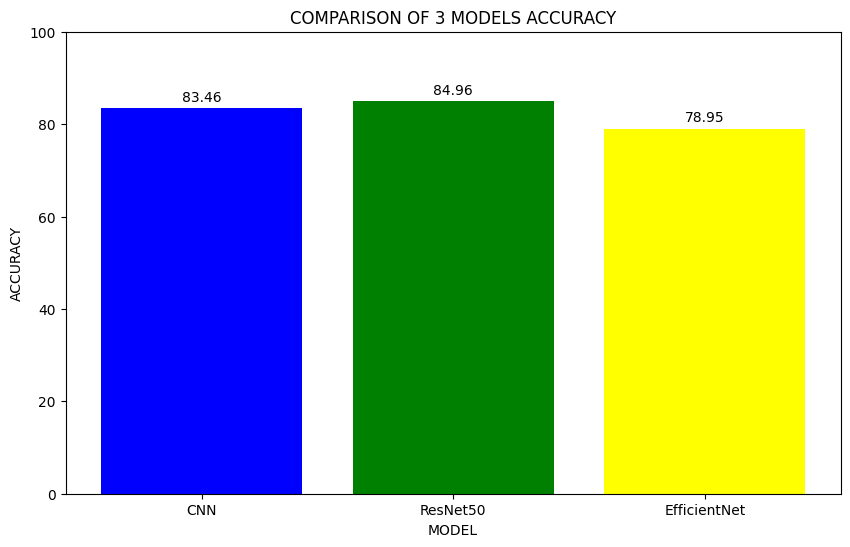

In [147]:
acc_CNN = (0.8346*100)
acc_RestNet50 = (0.8496*100)
acc_EfficientNet = (0.7895*100)

labels = ['CNN','ResNet50','EfficientNet']
accuracy = [acc_CNN,acc_RestNet50,acc_EfficientNet]

#Now i will plot a bar graph for the above three accuracy values
plt.figure(figsize=(10, 6))
bar = plt.bar(labels, accuracy, color=['blue', 'green','yellow'])
plt.bar_label(bar, padding=3)
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.title('COMPARISON OF 3 MODELS ACCURACY')
plt.ylim(0,100)
plt.show()


#**WE CAN SEE THAT PYTORCH(RESNET50) IS GIVING MORE ACCURACY THAN THE OTHER TWO MODELS. SO WE CAN CONCLUDE THE BEST MODEL AS RESTNET**